In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='white')
grey = '#696969'

In [2]:
df = pd.read_pickle('../data/watch_list_clean.pkl.xz')

In [3]:
df

,title,year,avg,status,eps,total_eps,times_watched,rating,anime_url,username
0,Day Break Illusion: il sole penetra le illusioni,2013,2.90,Watched,13,13,1,3.0,https://www.anime-planet.com/anime/day-break-i...,Ruth
1,Dog Days,2011,3.50,Watched,13,13,1,3.5,https://www.anime-planet.com/anime/dog-days,Ruth
2,Dog Days',2012,3.70,Watched,13,13,1,3.0,https://www.anime-planet.com/anime/dog-days-2,Ruth
3,Fantasista Doll,2013,2.47,Watched,12,12,1,2.5,https://www.anime-planet.com/anime/fantasista-...,Ruth
4,Fate/Kaleid Liner Prisma Illya,2013,3.54,Watched,10,10,1,3.5,https://www.anime-planet.com/anime/fate-kaleid...,Ruth
...,...,...,...,...,...,...,...,...,...,...
9205777,The Ancient Magus' Bride,2017,4.39,Watched,24,24,2,5.0,https://www.anime-planet.com/anime/the-ancient...,Rutendo
9205778,The Disastrous Life of Saiki K.,2016,4.47,Watched,120,120,2,5.0,https://www.anime-planet.com/anime/the-disastr...,Rutendo
9205779,The Seven Deadly Sins,2014,4.35,Watched,24,24,1,5.0,https://www.anime-planet.com/anime/the-seven-d...,Rutendo
9205780,The Seven Deadly Sins: Revival of The Commandm...,2018,4.37,Watched,24,24,1,5.0,https://www.anime-planet.com/anime/the-seven-d...,Rutendo


### `title`/`anime_url`

In [4]:
df['title'].nunique()

4489

Let's find out which titles are the most popular

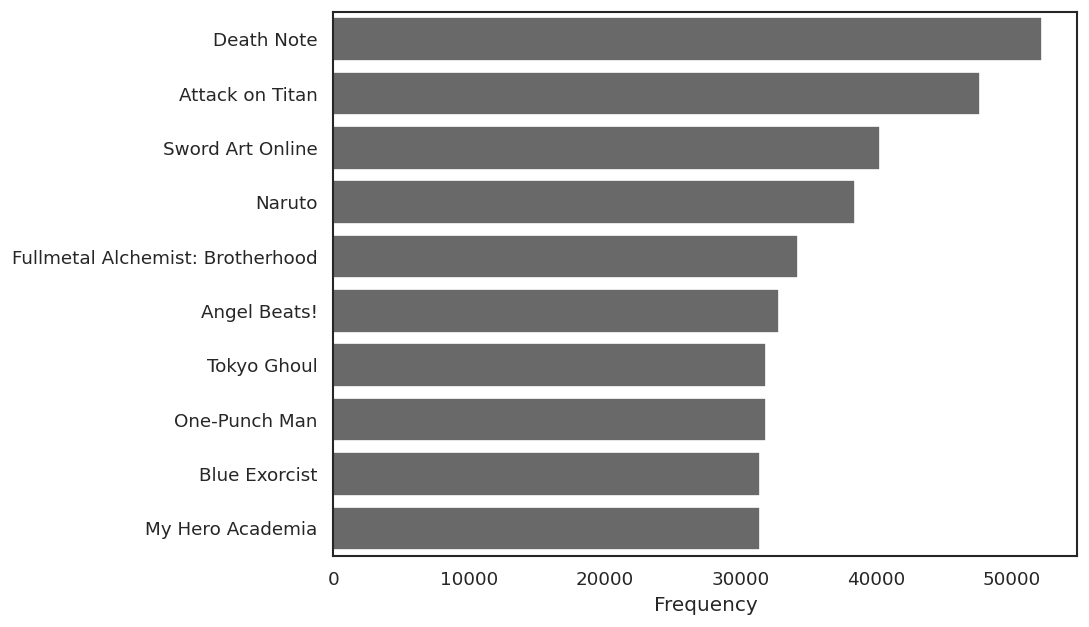

In [5]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.countplot(y='title', data=df, 
              order=df['title'].value_counts().iloc[:10].index,
              color=grey)
plt.xlabel('Frequency')
plt.ylabel('')
plt.show()

### `year`

In [6]:
df['year'].agg(['min', 'max'])

min    1961
max    2021
Name: year, dtype: int64

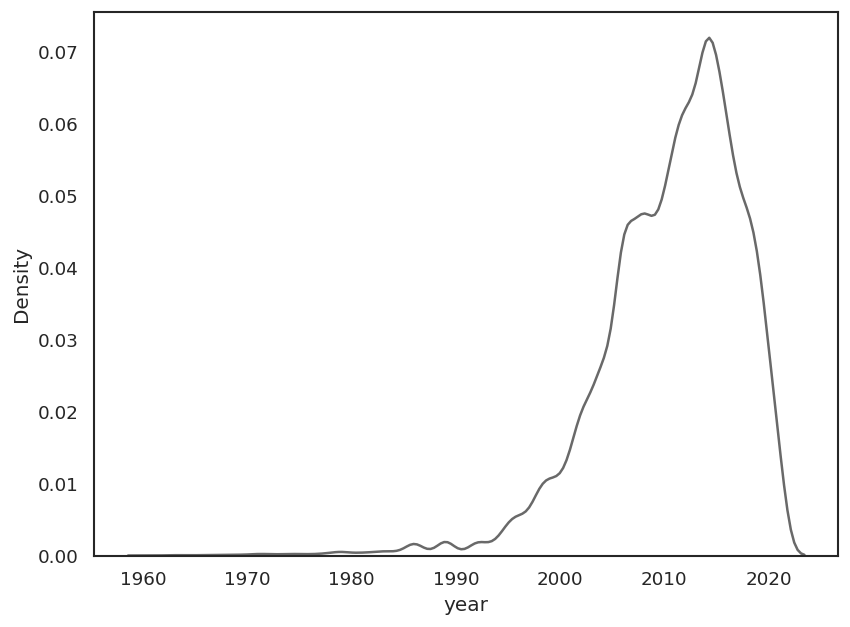

In [15]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.kdeplot(x=df['year'].astype('int'), bw_adjust=3, color=grey)
plt.show()

### `avg`

In [16]:
df['avg'].agg(['min', 'max'])

min    0.95
max    4.78
Name: avg, dtype: float64

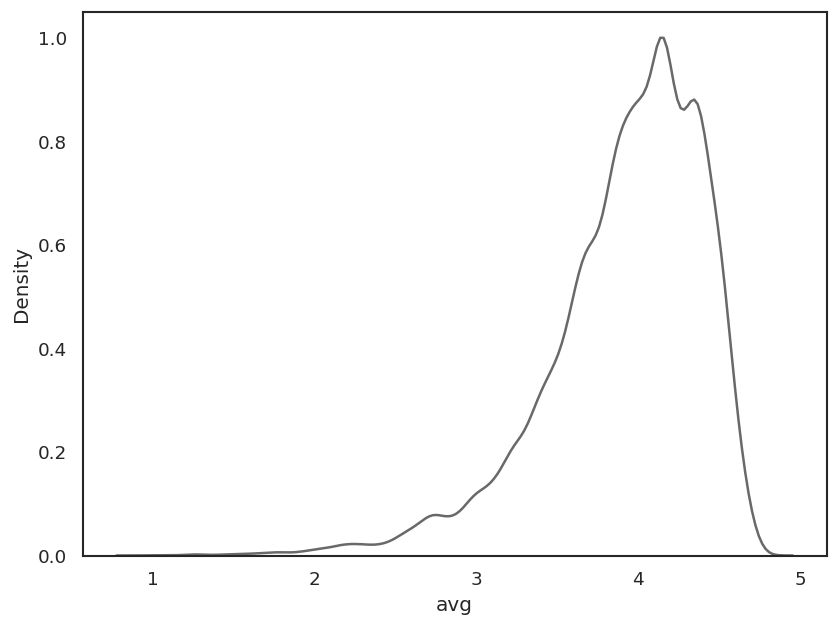

In [17]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.kdeplot(x=df['avg'].astype('float'), bw_adjust=3, color=grey)
plt.show()

### `status`

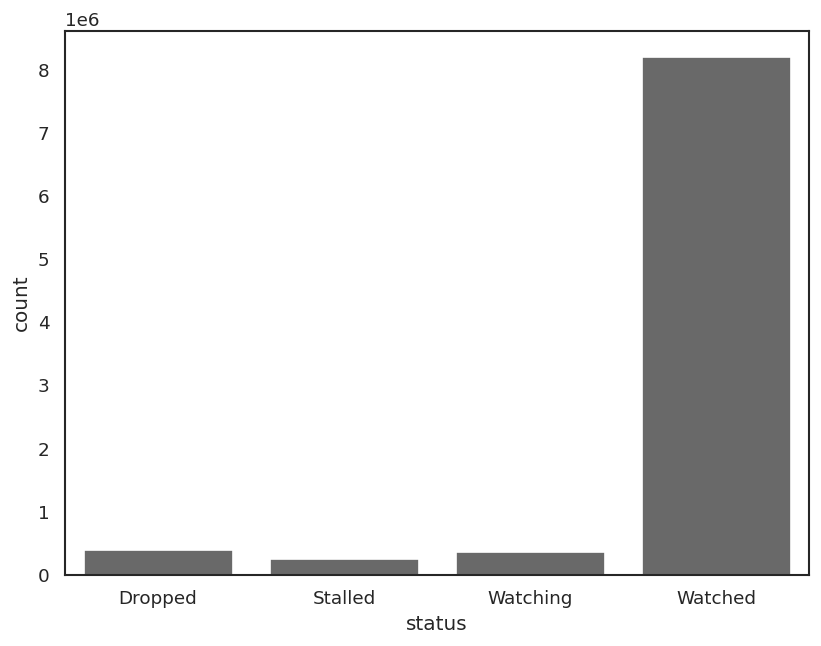

In [36]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.countplot(x='status', data=df, color=grey)
plt.show()

In [20]:
df['status'].value_counts()

Watched     8212789
Dropped      386440
Watching     354610
Stalled      251943
Name: status, dtype: int64

### `total_eps`

In [21]:
df['total_eps'].agg(['min', 'max'])

min       1
max    2614
Name: total_eps, dtype: int64

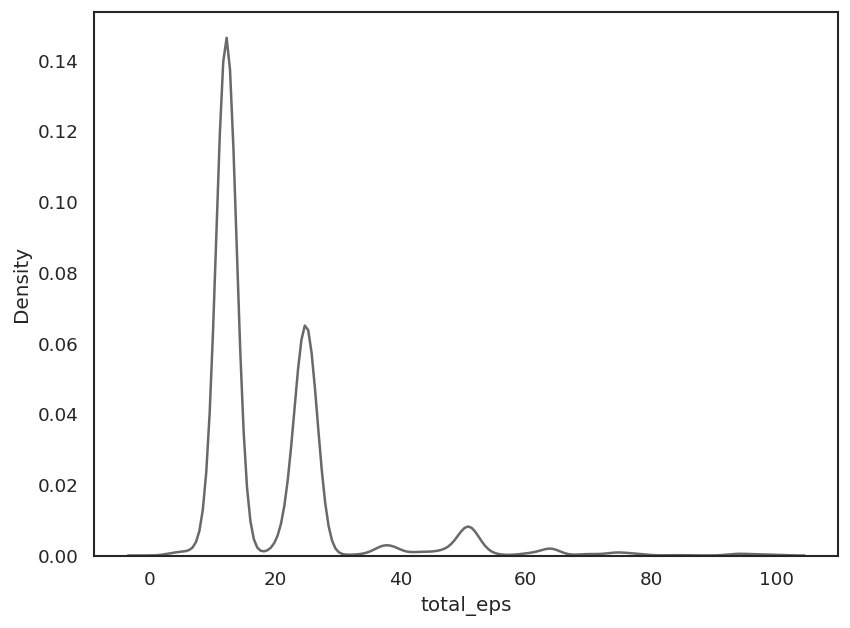

In [23]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.kdeplot(x=df.loc[df['total_eps'] <= 100, 'total_eps'], bw_adjust=3, color=grey)
plt.show()

In [27]:
df['total_eps'].value_counts().head(15)

12    3284559
13    1491727
24     896325
26     783844
25     735272
11     240414
10     199854
51     141901
22     134562
50      80516
23      68193
52      60444
64      55760
37      54893
39      43646
Name: total_eps, dtype: int64

### `times_watched`

In [28]:
df['times_watched'].agg(['min', 'max'])

min      0
max    181
Name: times_watched, dtype: int64

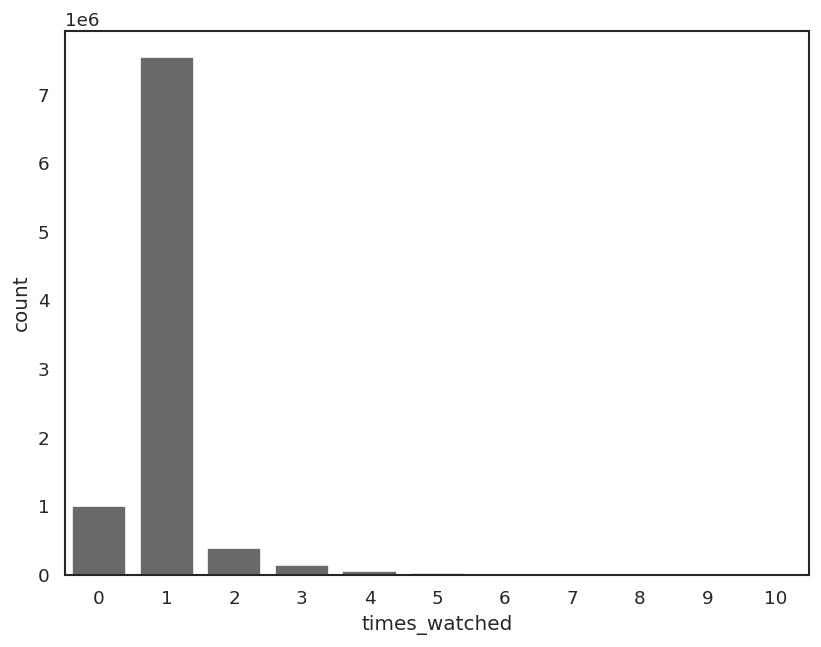

In [34]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.countplot(x=df.loc[df['times_watched'] <= 10, 'times_watched'], color=grey)
plt.show()

### `rating`

In [31]:
df['rating'].agg(['min', 'max'])

min    0.5
max    5.0
Name: rating, dtype: float64

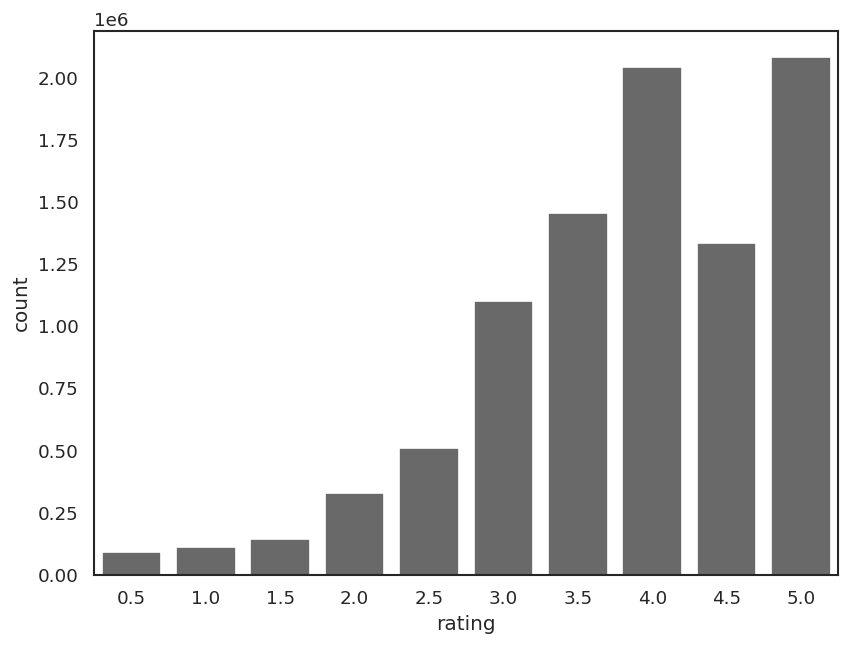

In [35]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.countplot(x=df['rating'], color=grey)
plt.show()

### `username`

In [37]:
df['username'].nunique()

117162

#### All statuses

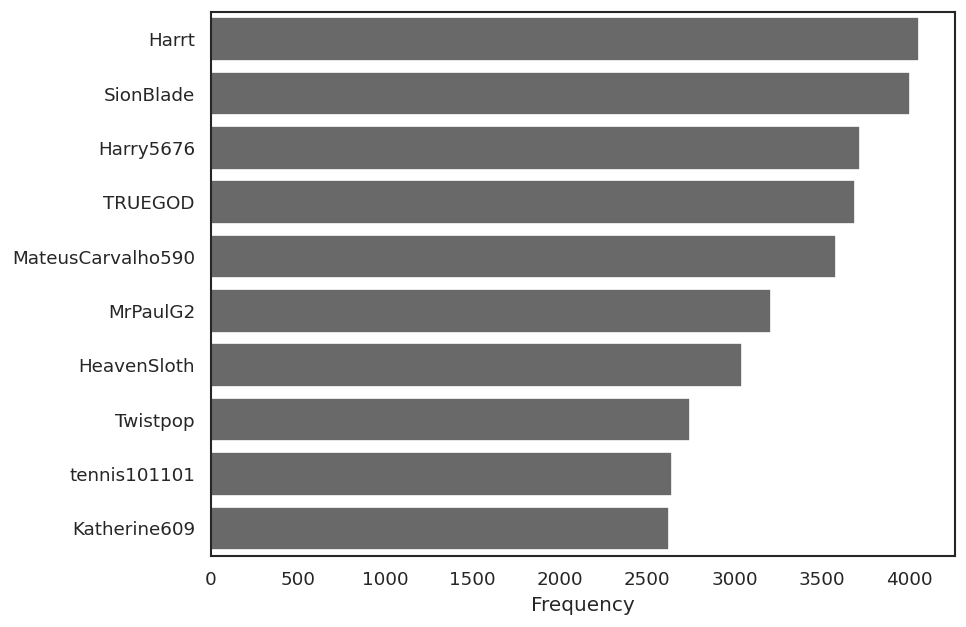

In [38]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.countplot(y='username', data=df, 
              order=df['username'].value_counts().iloc[:10].index,
              color=grey)
plt.xlabel('Frequency')
plt.ylabel('')
plt.show()

### Only watched

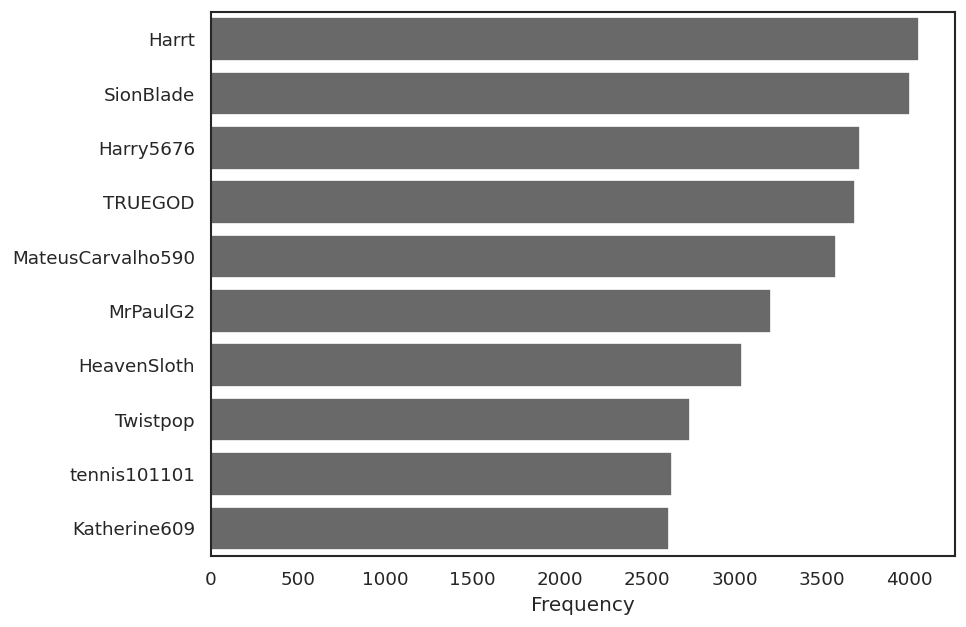

In [39]:
fig = plt.figure(figsize=(8, 6), dpi=120)
sns.countplot(y='username', data=df, 
              order=df.loc[df['status'] == 'Watched', 'username'].value_counts().iloc[:10].index,
              color=grey)
plt.xlabel('Frequency')
plt.ylabel('')
plt.show()

Wow... exact same users in the same order